# Estudo sobre os sentimentos nas músicas dos Beatles

### Este projeto analisa os sentimentos das músicas dos Beatles ao longo do tempo, classificando as letras como positivas, negativas ou neutras. Usando Python e bibliotecas como pandas, matplotlib e textblob, as músicas são processadas e agrupadas por compositor para comparar suas tendências emocionais. Covers foram excluídos da análise.

##  Instalando e importando os pacotes necessários

In [19]:
!pip install pandas matplotlib textblob nltk

In [20]:
# Importar bibliotecas necessárias
import pandas as pd  # Biblioteca para manipulação de dados
import matplotlib.pyplot as plt  # Biblioteca para visualização de gráficos
from textblob import TextBlob  # Biblioteca para análise de sentimentos
import nltk  # Biblioteca para processamento de linguagem natural
from nltk.corpus import stopwords  # Submódulo para remover stopwords
from nltk.tokenize import word_tokenize  # Submódulo para tokenizar textos

In [21]:
# Baixar recursos do nltk, como a lista de stopwords e o tokenizador
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\marce\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marce\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Funções utilizadas

### Foram utilizadas duas funções principais:
- <b>limpar_letras(letras)</b>: Responsável por tokenizar tirar as stopwords das músicas
- <b>encontrar_sentimento(letra)</b>: Responsável por pegar a letra da música e retornar um valor entre -1 e 1 para indicar o sentimento da música, sendo que quanto mais próximo o valor do -1 a música é negativa e quanto mais próximo do 1 a música é positiva

In [22]:
def limpar_letras(letras):
    palavras = word_tokenize(letras.lower())
    # Remover stopwords e palavras não alfabéticas (como números e símbolos)
    palavras_limpas = [palavra for palavra in palavras if palavra.isalpha() and palavra not in stopwords_en]
    return ' '.join(palavras_limpas) # Junta as palavras tokenizadas de volta em uma string limpa

def encontrar_sentimentos(letra):
    blob = TextBlob(letra)
    return blob.sentiment.polarity

## Abrindo a base de dados usada no estudo

### Os dados utilizados foram obtidos pelo GitHub do moizmb: 
- https://github.com/moizmb/beatles-lyrics/blob/master/clean-lyrics.csv

In [23]:
df = pd.read_csv('beatles_lyrics.csv')

df_letras = df.dropna()  # Remove NaN

# Filtra as músicas que não são covers
df_letras = df_letras[df_letras['cover'] == False]

# Definir stopwords em inglês
stopwords_en = set(stopwords.words('english'))  # Cria um conjunto de stopwords em inglês

## Aplicando tirando as stopwords e classificando os sentimentos das músicas analisadas

In [24]:
df_letras.loc[:, 'cleaned_lyrics'] = df_letras['lyrics'].apply(limpar_letras)

In [26]:
df_letras.loc[:, 'sentiment'] = df_letras['cleaned_lyrics'].apply(encontrar_sentimentos)

## Gráficos usados para o estudo

In [27]:
sentimentos_por_ano = df_letras.groupby('year')['sentiment'].mean().reset_index()

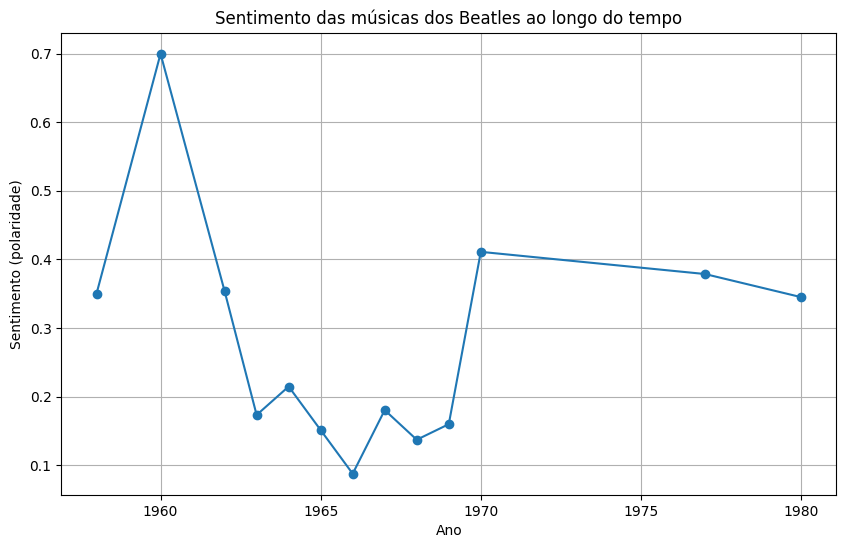

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(sentimentos_por_ano['year'], sentimentos_por_ano['sentiment'], marker='o', linestyle='-')
plt.title('Sentimento das músicas dos Beatles ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('Sentimento (polaridade)')
plt.grid(True)
plt.show()

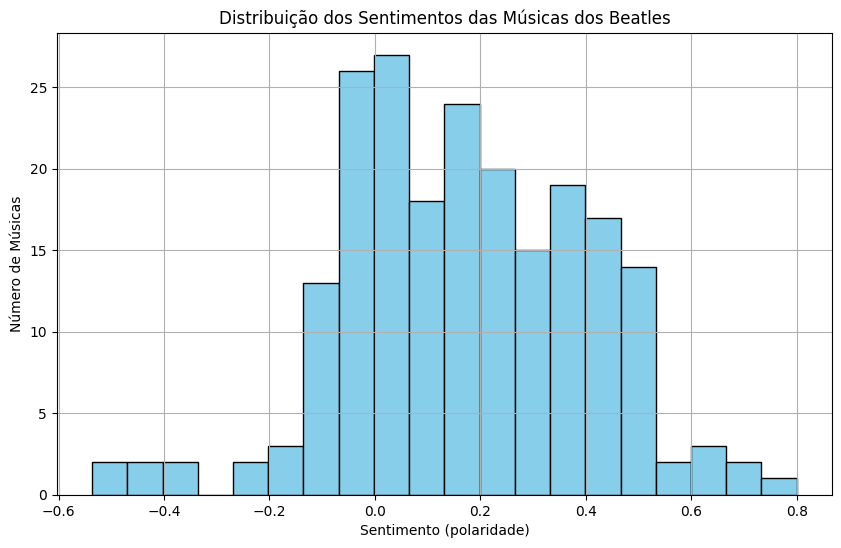

In [59]:
plt.figure(figsize=(10, 6))
plt.hist(df_letras['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição dos Sentimentos das Músicas dos Beatles')
plt.xlabel('Sentimento (polaridade)')
plt.ylabel('Número de Músicas')
plt.grid(True)
plt.show()

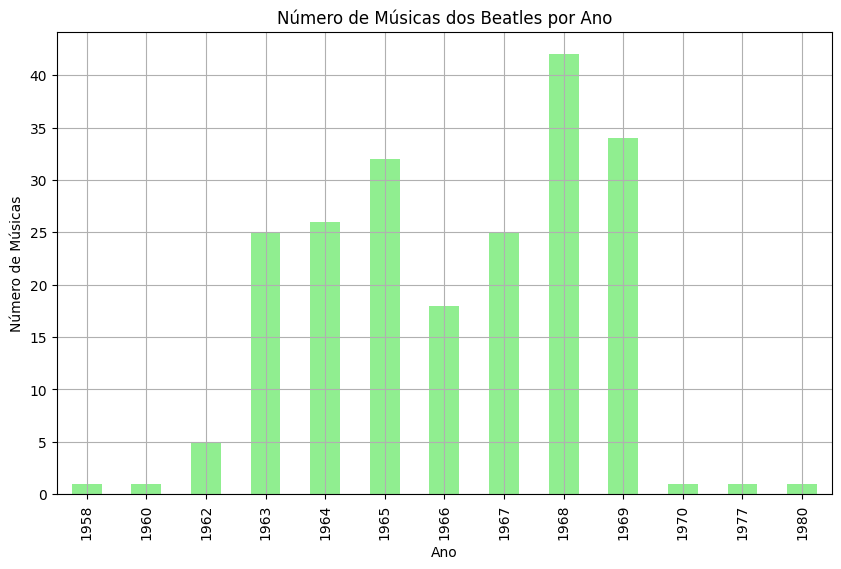

In [30]:
musicas_por_ano = df_letras['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
musicas_por_ano.plot(kind='bar', color='lightgreen')
plt.title('Número de Músicas dos Beatles por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Músicas')
plt.grid(True)
plt.show()

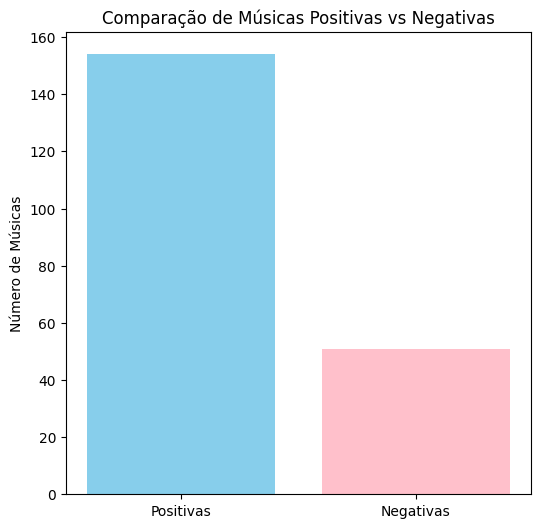

In [69]:
musicas_positivas = df_letras[df_letras['sentiment'] > 0].shape[0]
musicas_negativas = df_letras[df_letras['sentiment'] < 0].shape[0]

plt.figure(figsize=(6, 6))
plt.bar(['Positivas', 'Negativas'], [musicas_positivas, musicas_negativas], color=['skyblue', 'pink'])
plt.title('Comparação de Músicas Positivas vs Negativas')
plt.ylabel('Número de Músicas')
plt.show()

## Fazendo a analise para cada compositor da banda

In [33]:
# Filtrar músicas positivas e negativas
df_positivo = df_letras[df_letras['sentiment'] > 0]
df_negativo = df_letras[df_letras['sentiment'] < 0]

In [39]:
# Contar músicas positivas e negativas por compositor
musicas_positivas_por_compositor = df_positivo['songwriters_parsed'].value_counts()
musicas_negativas_por_compositor = df_negativo['songwriters_parsed'].value_counts()

In [49]:
# Juntar as contagens em um único DataFrame para facilitar a comparação
df_todos = pd.DataFrame({
    'Positivas': musicas_positivas_por_compositor,
    'Negativas': musicas_negativas_por_compositor
}).fillna(0)  # Preencher valores NaN com 0 para casos onde o compositor não tem músicas em uma das categorias

df_todos

,Positivas,Negativas
songwriters_parsed,,
"[""George Harrison""]",20.0,6.0
"[""John Lennon"", ""Paul McCartney"", ""George Harrison"", ""Ringo Starr""]",2.0,0.0
"[""John Lennon"", ""Paul McCartney"", ""Jean Nicolas"", ""Lee Montogue""]",1.0,0.0
"[""John Lennon"", ""Paul McCartney"", ""Ringo Starr""]",1.0,0.0
"[""John Lennon"", ""Paul McCartney""]",24.0,11.0
"[""John Lennon"", ""Yoko Ono"", ""George Harrison""]",0.0,1.0
"[""John Lennon""]",43.0,16.0
"[""McCartney"", ""John Lennon"", ""George Harrison""]",1.0,0.0
"[""Paul McCartney"", ""George Harrison""]",1.0,0.0


## Gráficos para uma analise mais 

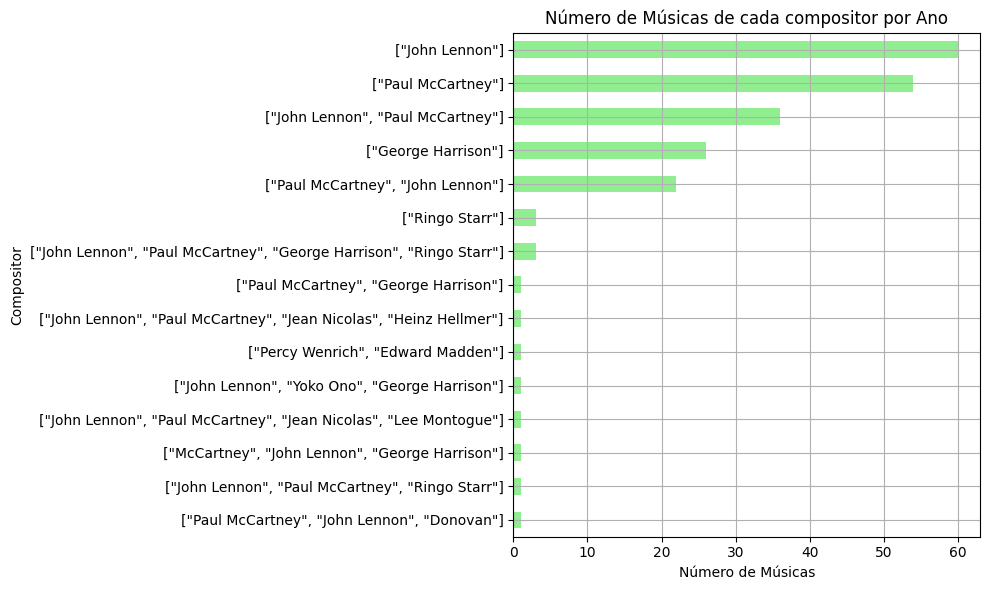

In [70]:
musicas_por_ano_compositor = df_letras['songwriters_parsed'].value_counts()

plt.figure(figsize=(10, 6))
musicas_por_ano_compositor.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Número de Músicas de cada compositor por Ano')
plt.xlabel('Número de Músicas')
plt.ylabel('Compositor')
plt.grid(True)
plt.tight_layout()
plt.show()

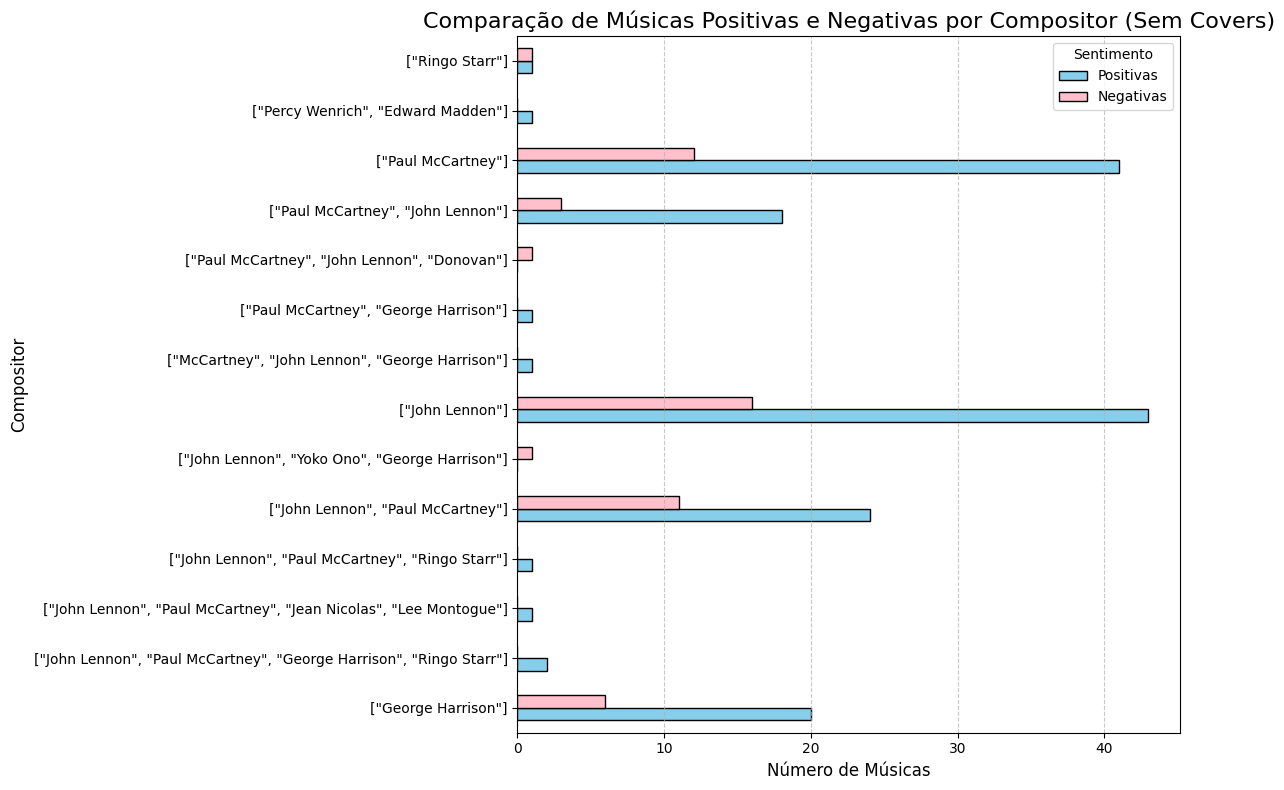

In [57]:
# Plotar gráfico de barras horizontais para comparação
ax = df_todos.plot(kind='barh', figsize=(12, 8), color=['skyblue', 'pink'], edgecolor='black')

plt.title('Comparação de Músicas Positivas e Negativas por Compositor (Sem Covers)', fontsize=16)
plt.xlabel('Número de Músicas', fontsize=12)
plt.ylabel('Compositor', fontsize=12)
plt.legend(title='Sentimento', loc='upper right')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()